# Week 7 Assignment
## Feature Engineering and Unsupervised Learning

In this assignment you will be introduced to the concept of feature engineering and it's importance in boosting the predictive power of your machine learning models

__Raster Files__: 

    - Landsat.tif (remotely sensed data in the form of surface reflactance, will be used as the input to our models) [values (0 - 10000)] numerical
    - Impervious.tif (NLCD fractional impervious map, will be used as our "ground truth" in training some of our modes) [values (0 - 100)] numerical
    - Dem.tif (ancillary data in the form of elevation data) [values (0 - 10000)] numerical
    - Aspect.tif (ancillary data in the form of downslope direction) [values (0 - 8)] categorical
    - Posidex.tif (ancially date in the form of positional index) [values (0 - 100)] numerical
    - Wetlands.tif (ancillary data in the form of wetlands information) [values (0 - 17)] categorical

## 1. Import the required libraries

> __HINT__: Find the libraries you need to import in the assignment instructions

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

### 1a. Import your linear regression processing functions

>__HINT__: store your functions in a 'functions.py' file in this working directory so you can import them

In [2]:
from functions import preprocess

## 2. Read and transform dataset
> Read in original csv data -> transform the dataset using your "regression" preprocessing function to predict the impervious fractional cover value (1-100)

In [3]:
dataset = preprocess('s3://geokarma-testing/geoKARMA_h24v13_pixelbased_dataset.csv')

## 3. Get basic information about the dataset

#### 3a. Print dimensions of the dataset

In [4]:
dataset.shape

(131307, 42)

#### 3b. Print the first five observations

In [5]:
dataset.head()

,landsat_1,landsat_2,landsat_3,landsat_4,landsat_5,landsat_6,dem_1,posidex_1,landcover_1,impervious_1,...,aspect_1_17,aspect_1_18,wetlands_1_0,wetlands_1_2,wetlands_1_3,wetlands_1_4,wetlands_1_5,wetlands_1_6,wetlands_1_7,wetlands_1_8
0,481,715,731,3519,2286,1386,239.0,91,21,13,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,164,375,295,2513,1327,620,156.0,78,21,16,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2576,2853,3093,3513,2932,1979,314.0,44,24,83,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,295,510,412,3151,1564,884,369.0,84,21,4,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,197,459,278,3481,1696,760,236.0,40,21,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 3c. Print the dataset columns

In [6]:
dataset.columns

Index(['landsat_1', 'landsat_2', 'landsat_3', 'landsat_4', 'landsat_5',
       'landsat_6', 'dem_1', 'posidex_1', 'landcover_1', 'impervious_1',
       'urban_count_7', 'urban_count_5', 'urban_count_3', 'xgeo', 'ygeo',
       'aspect_1_0', 'aspect_1_1', 'aspect_1_2', 'aspect_1_3', 'aspect_1_4',
       'aspect_1_5', 'aspect_1_6', 'aspect_1_7', 'aspect_1_8', 'aspect_1_9',
       'aspect_1_10', 'aspect_1_11', 'aspect_1_12', 'aspect_1_13',
       'aspect_1_14', 'aspect_1_15', 'aspect_1_16', 'aspect_1_17',
       'aspect_1_18', 'wetlands_1_0', 'wetlands_1_2', 'wetlands_1_3',
       'wetlands_1_4', 'wetlands_1_5', 'wetlands_1_6', 'wetlands_1_7',
       'wetlands_1_8'],
      dtype='object')

# 4. Feature Generation

>__NOTE__: Take a look at the feautes 'urban_count_7', 'urban_count_5', 'urban_count_3', we have not been able to use these features yet and that is because they were engineered as part of a feature engineering step. These are not features that are directly provided in the "raw" data. These are spatial features that were generated based on the original data.

![title](spatial_counts.png)

The spatial features are computed using the impervious descriptor layer and are pixel counts of impervious pixels surrounding the pixel in question. When these features are computed for a particular pixel, that pixel is placed in the center of a 7x7, 5x5, and 3x3 window and the number of neighboring pixels with an impervious classification is then counted for each spatial kernel. These models are "pixel based" models so they can't learn "spatial" information but that doesn't mean we can't generate spatial features and feed them into the model

>__NOTE__: see geo_create_dataset.ipynb from week 1 to see how these were computed

## 4a. Create a correlation heatmap with the numerical columns
> The numerical columns are: 'landsat_1', 'landsat_2', 'landsat_3', 'landsat_4', 'landsat_5',
       'landsat_6', 'dem_1', 'posidex_1', 'landcover_1', 'impervious_1',
       'urban_count_7', 'urban_count_5', 'urban_count_3'
            
> __HINT__: You can check the assignment instructions for the code

Take a look at the correlation between our spatial feature and the "impervious_1" column

<Axes: >

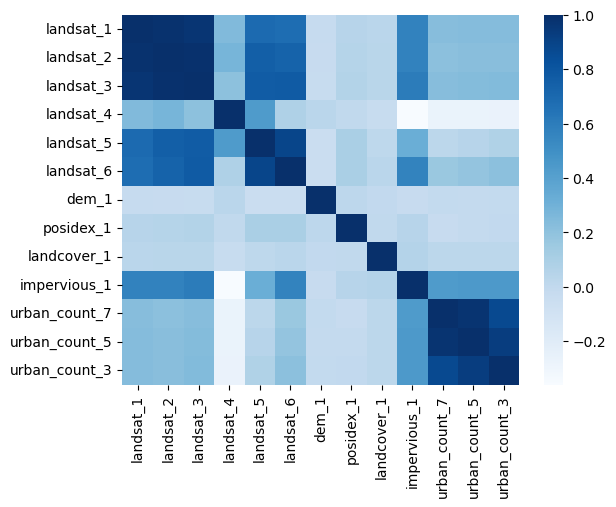

In [7]:
columns = [ 'landsat_1', 'landsat_2', 'landsat_3', 'landsat_4', 'landsat_5', 'landsat_6', 'dem_1', 'posidex_1', 'landcover_1', 'impervious_1', 'urban_count_7', 'urban_count_5', 'urban_count_3']
sns.heatmap(dataset[columns].corr(), cmap='Blues')

## 4b. Create a Boxplot for each of the spatial features in relation to (by) "impervious_1"
> The spatial features are:
       'urban_count_7', 'urban_count_5', 'urban_count_3'
            
> __HINT__: You can check the assignment instructions for the code

What can these plots tell us about the relationship between our features and our dependent variable?

<Axes: title={'center': 'urban_count_7'}, xlabel='impervious_1'>

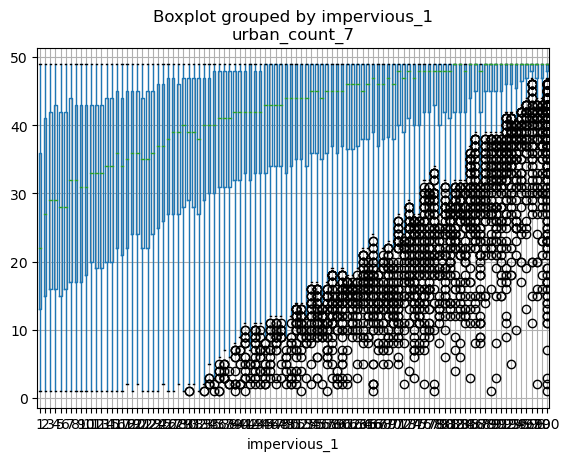

In [30]:
dataset.boxplot(column='urban_count_7', by='impervious_1')

<Axes: title={'center': 'urban_count_7'}, xlabel='impervious_1'>

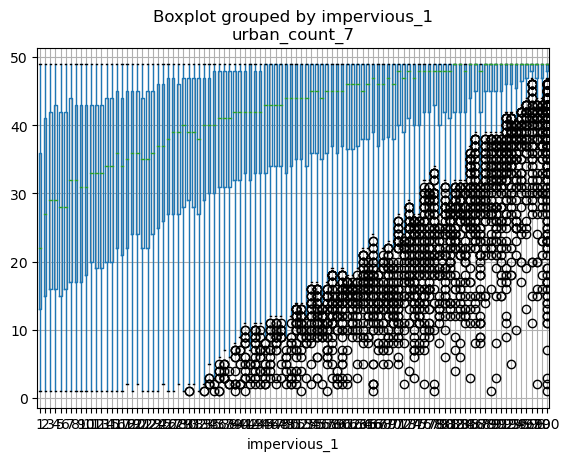

In [31]:
dataset.boxplot(column='urban_count_7', by='impervious_1')

<Axes: title={'center': 'urban_count_7'}, xlabel='impervious_1'>

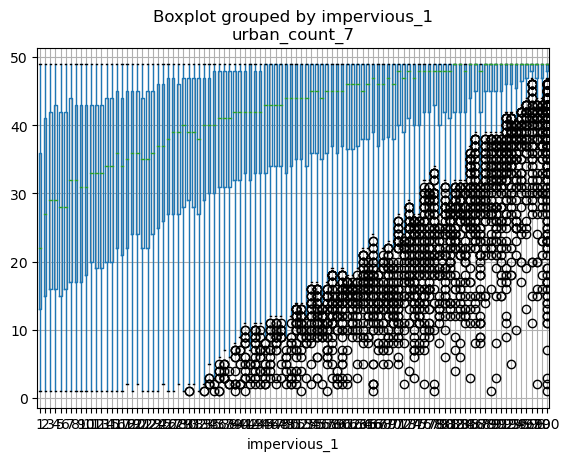

In [32]:
dataset.boxplot(column='urban_count_7', by='impervious_1')

## 4c. Generate Spectral Features

Some of the most common remote sensing features that can be engineered are spectral indices. We will implement NDVI (Normalized difference vegetation index) what other indices do you think might be useful? Compute them and add them to your feature space when you train your model

>__HINT__: NDVI = (Band 4 - Band 3) / (Band 4 + Band 3)

In [36]:
dataset['NDVI'] = (dataset['landsat_4'] - dataset['landsat_3']) / (dataset['landsat_4'] + dataset['landsat_3'])

## Part 2: MULTIVARIATE LINEAR REGRESSION

We are going perform the same model training as we did in Week 3 with the engineered features added in and see if the feature engineering improved our predictive power

### 1. Feature Selection

#### 1a. Assign the target and feature variables in the model

> __RECAP__: __Target variable__ is the dependent variable ie the variable whose value we want to predict.
> Here, the target variable is __'impervious_1'__

> __Feature variable__ is the independent variable ie the variable whose value is used to predict the value of the dependent variable

> Here, the numerical feature variables are: __landsat-{i}, urban_count_{i}, ndvi, dem-1, posidex-1__ and the categorical feature variables are:  __aspect-{i}, wetlands-{i}__

In [37]:
target = 'impervious_1'
features = [
    'landsat_1', 'landsat_2', 'landsat_3', 'landsat_4', 'landsat_5', 'landsat_6',  
    'aspect_1_0', 'aspect_1_1', 'aspect_1_2', 'aspect_1_3', 'aspect_1_4',
    'aspect_1_5', 'aspect_1_6', 'aspect_1_7', 'aspect_1_8', 'aspect_1_9', 
    'aspect_1_10', 'aspect_1_11', 'aspect_1_12', 'aspect_1_13', 'aspect_1_14',
    'aspect_1_15', 'aspect_1_16', 'aspect_1_17','aspect_1_18', 
    'wetlands_1_0', 'wetlands_1_2', 'wetlands_1_3', 'wetlands_1_4', 
    'wetlands_1_5', 'wetlands_1_6', 'wetlands_1_7', 'wetlands_1_8',
    'dem_1', 'posidex_1', 'urban_count_7', 'urban_count_5', 'urban_count_3', 'NDVI'
]

#### 1b. Assign the feature variable columns to variable "X" and the target variable column to the variable "y"

In [38]:
X = dataset[features]
y = dataset[target]

#### 1c. Print dimensions of X and y
> You will get this in the form __(rows,columns)__

In [40]:
X.shape, y.shape

((131307, 39), (131307,))

## 2. Train-test split
> __RECAP__: The model is trained on the __train set__. It is used to fit the model.

> The __test set__ is used to evaluate the performance of the final model.

#### 2a. Split the data into train and test sets

> The __test_size__ argument is used to specify the size of the split. In this problem, we will use a train-test split of 0.7 and 0.3 respectively. 

> The __random_state__ argument controls the shuffling applied to the data before applying the split. To get a reproducible output, we pass a fixed value. Here, pass a value of 1.


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### 2b. Print dimensions of the train and test sets

In [43]:
X_train.shape, X_test.shape

((91914, 39), (39393, 39))

#### 2c. Fit the linear regression model
> __HINT__: You can find the code in the assignment instructions

In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### 2d. Print the slope and intercept of the regression line

In [47]:
print(model.coef_)
print(model.intercept_)

[ 5.50039353e-03  4.46906503e-02 -3.79546100e-02  1.31443453e-03
 -2.22469373e-02  2.05200728e-02  1.82470252e-01  2.98409830e-01
  4.57259573e-01  9.68541309e-02 -2.61461456e-02 -8.98600562e-03
 -2.62354543e-01  2.67127629e-01 -1.47394062e-01  1.78963739e-01
 -7.30814555e-02 -1.82858021e-01 -2.84409380e-01 -2.85255285e-01
 -3.15226346e-01  1.41441632e-01 -6.77732219e-02 -2.56586893e-01
  2.87544573e-01 -2.45198634e+00 -1.68996729e+00 -1.51151762e+00
 -3.07307894e+00  2.10913997e-01  1.22994014e+01 -3.53179435e+00
 -2.51970845e-01 -1.44588544e-04  7.13781133e-03  1.09978064e-01
  3.42062953e-02  1.14122798e+00 -9.98018967e+01]
90.62612791200407


## 3. Model evaluation

#### 3a. Print the R^2 values of the training and testing sets

Think about what this tells us, how well can we expect our outputs to match up with ground truth?

Is this better than what we got in week 3? 

Which is better, higher R^2 or lower?

In [49]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.718453349047445
0.7146864182734154


## 3b. Mean Squared Error
> __RECAP__: Mean Squared Error (MSE) is a measure of how close a fitted line is to data points. The lower its value, the better is our model.

Think about the data you are trying to predict. You are trying to predict a value 1-100 so how does your RMSE relate to that? How poor or how good of a performance does this model have?

#### 3c. Assign predicted values of the train set to “train_pred” and predicted values of the test set to “test_pred” 

In [50]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

#### 3c.	Print the Mean Squared Error of the train set
> __HINT__: Check the assignment instructions for how to do this.

Is this better than what we had in assignment 3? 

Is a higher MSE better or is a lower MSE better?

In [51]:
mean_squared_error(y_train, train_pred, squared=False)

14.175196703005826

#### 3d.	Print the Mean Squared Error of the train set
> __HINT__: Check the assignment instructions for how to do this.

Is this better than what we had in assignment 3? 

Is a higher MSE better or is a lower MSE better?

In [52]:
mean_squared_error(y_test, test_pred, squared=False)

14.31630358440971

# OPTIONAL: Retrain the Binary classification logistic regression model with the added spatial features

# Part 3. Unsupervised Learning

Unsupervised learning is a form of machine learning used when you don't have access to training labels to train a supervised learning model but still want to form some sort of classification on the data. It is important to note that unsupervised learning can also be used, in the right context, to generate features to be fed into supervised learning models for training or for creating training labels in some cases. The circumstances are important and the fine details matter when determining if these types of solutions can be employed, but just know they have a wider use-case than might appear at first glance

## 1. Import the required libraries

> __HINT__: Find the libraries you need to import in the assignment instructions

In [53]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## K-Means Clustering

#### 1a. Standardize "X" for clustering and assign it to a new variable called "X_scaled" 

> Here you'll learn how to implement the K-Means algorithm by working with our same dataset. K-means is a clustering algorithm that partitions the observations into a number of clusters (k), in which each observation belongs to the cluster with the nearest mean. 

> The K-means algorithm uses Euclidean distance. For these distances to be valid representations of the real differences between observations, all features need to have the same scale. We do this by removing the mean and scaling to unit variance.

## 1. Feature Selection

#### 1a. Assign the feature variables to a variable called "features" in the model

> Here, the feature variables are: 'landsat_1', 'landsat_2', 'landsat_3', 'landsat_4', 'landsat_5',
       'landsat_6', 'dem_1', 'posidex_1', 'urban_count_7', 'urban_count_5', 'urban_count_3',
       'aspect_1_0', 'aspect_1_1', 'aspect_1_2', 'aspect_1_3', 'aspect_1_4',
       'aspect_1_5', 'aspect_1_6', 'aspect_1_7', 'aspect_1_8', 'aspect_1_9',
       'aspect_1_10', 'aspect_1_11', 'aspect_1_12', 'aspect_1_13',
       'aspect_1_14', 'aspect_1_15', 'aspect_1_16', 'aspect_1_17',
       'aspect_1_18', 'wetlands_1_0', 'wetlands_1_2', 'wetlands_1_3',
       'wetlands_1_4', 'wetlands_1_5', 'wetlands_1_6', 'wetlands_1_7',
       'wetlands_1_8', 'NDVI'

> create a variable X from the dataframe using those features

In [67]:
features = ['landsat_1', 'landsat_2', 'landsat_3', 'landsat_4', 'landsat_5',
       'landsat_6', 'dem_1', 'posidex_1', 'urban_count_7', 'urban_count_5', 'urban_count_3', 'NDVI']
X = dataset[features]

#### 1b. Standardize "X" for clustering and assign it to a new variable called "X_scaled" 

> The K-means algorithm uses Euclidean distance. For these distances to be valid representations of the real differences between observations, all features need to have the same scale. We do this by removing the mean and scaling to unit variance.

StandardScaler() standardizes features by subtracting the mean and dividing by standard deviation. It standardizes every column separately 

The standard score of a sample x is calculated as: z = (x - u) / s 

where u is the mean of x (the column being standardized) and s is the standard deviation of the same

By doing this, the mean of z (the standardized version of column x) becomes 0 and standard deviation becomes 1.  

In [68]:
X_scaled = StandardScaler().fit_transform(X)

In [69]:
X_scaled.shape

(131307, 12)

#### 1c. Plot inertia curve and choose the number of clusters based on the elbow method

> Inertia measures how well a dataset was clustered by K-Means. It is the sum of squared distances of samples to their closest cluster centre. A good model is one with low inertia and a low number of clusters ( K ). That's why we use the elbow method to select the value of K.

> The sharp point of bend (that looks like an elbow joint) will be considered as the best/optimal value of K

Inertia measures how well a dataset was clustered by K-Means. It is the sum of squared distances of samples to their closest cluster centre. A good model is one with low inertia and a low number of clusters ( K ). That's why we use the elbow method to select the value of K. 

The sharp point of bend (that looks like an elbow joint) will be considered as the best/optimal value of K.

>__NOTE__: If you run into memory issues or the code throws an error, try training teh model on a subset of the data X_scaled[:num_examples, :]

In [70]:
ks = np.arange(1, 21)
scores = []

for k in ks:
    model = KMeans(n_clusters=k, n_init=2, random_state=0).fit(X_scaled[:10000, :])
    scores.append(model.inertia_)
scores

[120138.94008647694,
 91071.03022001742,
 70549.93019721852,
 58208.328985483386,
 52661.45010941647,
 48603.992054297756,
 45756.838454946876,
 40991.720676707264,
 41440.75158196624,
 36931.51129194119,
 35227.55075007738,
 34168.852373200425,
 32822.65085672677,
 31884.579846336183,
 31052.14054912027,
 30151.72653238012,
 29485.498804240116,
 28841.85167957851,
 28037.30423356677,
 27409.604836613013]

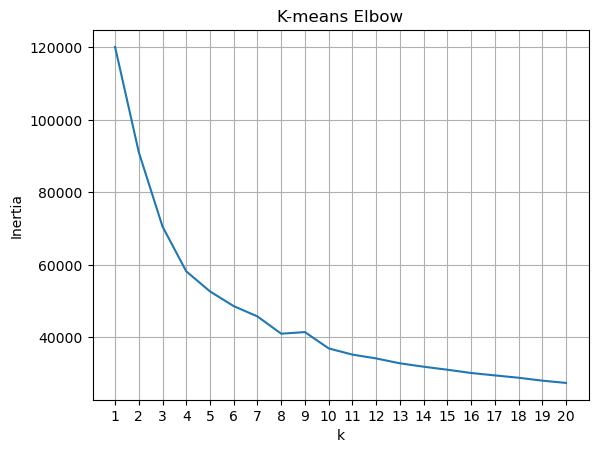

In [71]:
plt.plot(ks, scores)
plt.title('K-means Elbow') 
plt.xlabel('k') 
plt.ylabel('Inertia') 
plt.xticks(ks) 
plt.grid() 

### The sharp point of bend (that looks like an elbow joint) will be considered as the best/optimal value of K. Fitting the model using the first 10000 observation, you can see that the optimal value of K is 8. (Yours might be different and that is okay) 

#### 1d. Using k=optimal_clusters, create K-Means model and fit it to X_scaled

In [72]:
model = KMeans(n_clusters=8, n_init=2, random_state=0).fit(X_scaled)

#### 1e. Create a new column called "cluster" in the dataframe X and assign it the value 'assigned_clusters'

> __HINT__: You can check the assignment instructions for the code

In [73]:
assigned_clusters = model.fit_predict(X_scaled)
new_centroids = model.cluster_centers_
X['cluster'] = assigned_clusters

/tmp/ipykernel_12966/1860002456.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = assigned_clusters


#### 1f. Print the number of unique values in X['cluster'] to verify that there are 'optimal_clusters' number of clusters

In [74]:
X.value_counts("cluster")

cluster
2    29197
0    25257
7    24324
6    23699
3    15968
5     6174
1     5737
4      951
Name: count, dtype: int64

#### 1g. Group the dataframe X based on 'cluster' and print the mean values

> __HINT__: You can check the assignment instructions for the code

> Here, you are calculating the mean of the feature variables. Notice how the values change from one cluster to the other.

> What interesting insights can you get from the table?

In [75]:
X.groupby('cluster').mean()

,landsat_1,landsat_2,landsat_3,landsat_4,landsat_5,landsat_6,dem_1,posidex_1,urban_count_7,urban_count_5,urban_count_3,NDVI
cluster,,,,,,,,,,,,
0,253.577187,472.402106,346.038405,3157.083422,1599.468108,734.221602,314.607363,49.762086,17.726215,10.060973,4.507938,0.798907
1,1344.714311,1778.208297,1998.833885,2946.962698,3158.383301,2467.278717,273.150794,53.714311,43.361687,22.977166,8.629249,0.194097
2,355.966229,600.592013,522.545707,2939.399973,1830.199884,987.606124,300.508032,66.253040,42.159914,22.502997,8.531870,0.694836
3,469.448898,783.590807,767.230023,3180.943011,2484.970253,1444.040393,274.854578,56.907127,19.254384,11.351077,5.225451,0.609191
4,3931.636172,4649.148265,5080.011567,5829.711882,4992.739222,2616.773922,268.033086,53.254469,46.662461,24.283912,8.893796,0.071906
5,390.670554,641.877713,582.433107,2880.678328,1858.635892,1045.798186,-213.522029,50.541302,34.241497,18.491740,7.241497,0.661063
6,631.447403,935.422803,984.247352,2465.830921,2192.416389,1514.441875,294.109639,51.738850,44.067345,23.401536,8.790540,0.421270
7,280.363427,486.022324,383.622759,2779.499466,1480.265581,737.255591,293.241983,31.371567,41.269364,21.792633,8.215507,0.751505
